In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


### a)

In [3]:


np.random.seed(0)
n = 100

X1 = np.random.normal(loc=0, scale=1, size=n)
X2 = np.random.normal(loc=5, scale=2, size=n)

beta0 = 2
beta1 = 3
beta2 = -1
noise = np.random.normal(loc=0, scale=1, size=n)
Y = beta0 + beta1 * X1 + beta2 * X2 + noise

df = pd.DataFrame({"X1": X1, "X2": X2, "Y": Y})
df

,X1,X2,Y
0,1.764052,8.766301,-1.843326
1,0.400157,2.304482,0.656611
2,0.978738,2.459030,3.576844
3,2.240893,6.938793,2.439150
4,1.867558,2.653753,5.589052
...,...,...,...
95,0.706573,4.656907,0.599704
96,0.010500,6.543581,-4.414356
97,1.785870,6.647008,1.293557
98,0.126912,9.326472,-7.345185


### b)

In [4]:
def simple_reg(outcome, feature):
    outcome_mean = np.mean(outcome)
    feature_mean = np.mean(feature)

    slope_numerator = outcome_mean * feature_mean - np.mean(outcome * feature)
    slope_demoninator = outcome_mean ** 2 - np.mean(outcome ** 2)

    slope = slope_numerator / slope_demoninator

    intercept = feature_mean - slope * outcome_mean

    return intercept, slope

### c)

In [5]:
beta1 = 10

### d)

In [6]:
beta0, beta2 = simple_reg(Y - beta1 * X1, X2)
beta0, beta2

(4.7931469237531905, -0.10183628336421457)

### e)

In [23]:
beta0, beta1 = simple_reg(Y - beta2 * X2, X1)
result_e = (beta0, beta1, beta2)
result_e    

(0.6468293815770312, 0.233134737258272, -0.10183628336421457)

### f)

In [8]:
n_iter = 1000
f_beta1_list, f_beta2_list, f_beta0_list = list(), list(), list()

for i in range(n_iter):
    f_beta1 = random.randint(0, 20)
    f_beta0, f_beta2 = simple_reg(Y - f_beta1 * X1, X2)

    f_beta1_list.append(f_beta1) 
    f_beta2_list.append(f_beta2) 
    f_beta0_list.append(f_beta0) 


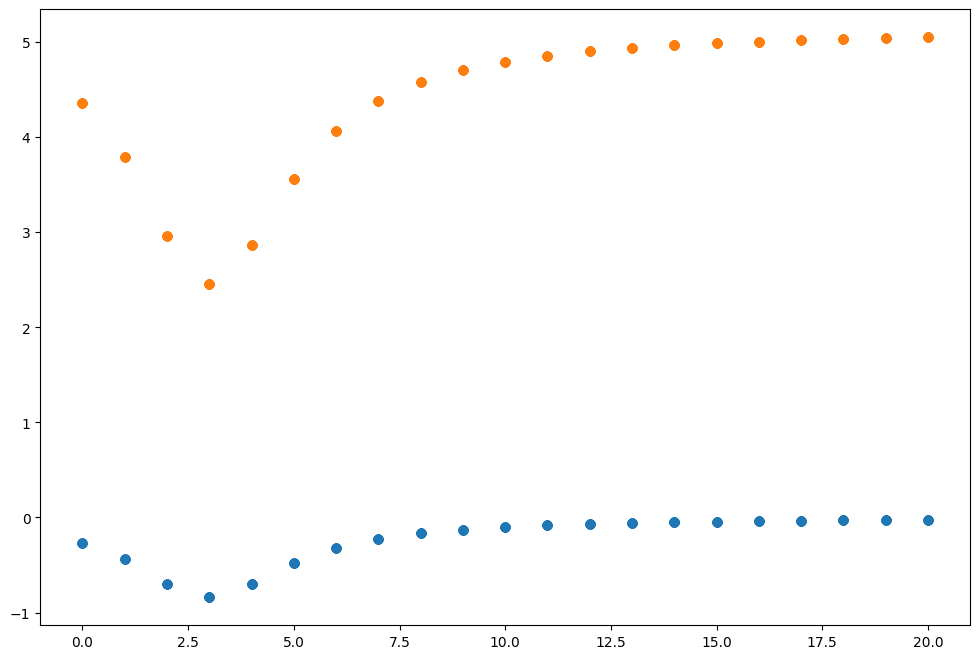

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(f_beta1_list, f_beta2_list)
ax.scatter(f_beta1_list, f_beta0_list)

plt.show()

### g)

In [19]:
from sklearn.linear_model import LinearRegression


multi_ols = LinearRegression(fit_intercept=True).fit(df[["X1", "X2"]], df["Y"])

In [25]:
multi_ols.intercept_, multi_ols.coef_


(1.8224249547047129, array([ 3.06681637, -0.97785708]))

In [24]:
result_e

(0.6468293815770312, 0.233134737258272, -0.10183628336421457)

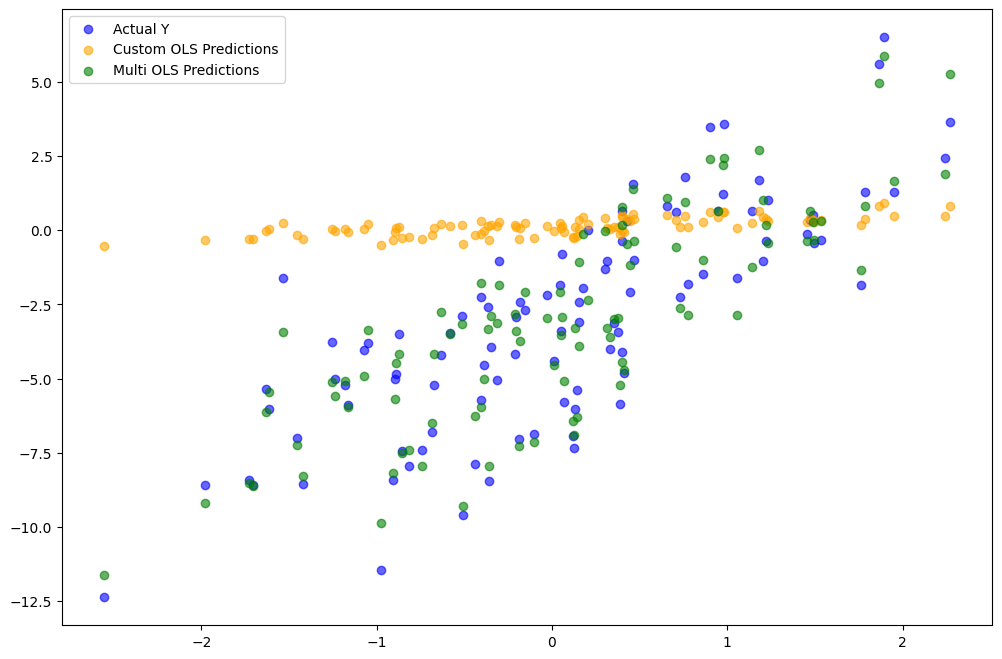

In [33]:
g_preds = multi_ols.predict(df[["X1", "X2"]])
e_preds = result_e[0] + result_e[1] * df["X1"] + result_e[2] * df["X2"]


fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df["X1"], df["Y"], color='blue', label='Actual Y', alpha=0.6)
ax.scatter(df["X1"], e_preds, color='orange', label='Custom OLS Predictions', alpha=0.6)
ax.scatter(df["X1"], g_preds, color='green', label='Multi OLS Predictions', alpha=0.6)

ax.legend()

plt.show()